In [1]:
import pandas as pd

# Load the files
categorical_col_names = pd.read_csv('categorical_col_names 2.csv')
numerical_col_names = pd.read_csv('numerical_col_names 2.csv')
filtered_sales_data = pd.read_csv('filtered_sales_data 2.csv')

# Assuming that the column names are in the first column of the loaded csv
categorical_columns = categorical_col_names.iloc[:, 0].tolist()
numerical_columns = numerical_col_names.iloc[:, 0].tolist()

# Separate the filtered sales data
categorical_data = filtered_sales_data[categorical_columns]
numerical_data = filtered_sales_data[numerical_columns]

# Extract 'sale_price' as the target variable
if 'sale_price' in filtered_sales_data.columns:
    y = filtered_sales_data['sale_price']
else:
    print("The column 'sale_price' was not found in the filtered_sales_data DataFrame.")

# You can now work with `categorical_data`, `numerical_data`, and the target variable `y`



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'numerical_data' only contains features and 'y' is the target variable already extracted

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(numerical_data, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace 0 with a very small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


NameError: name 'numerical_data' is not defined

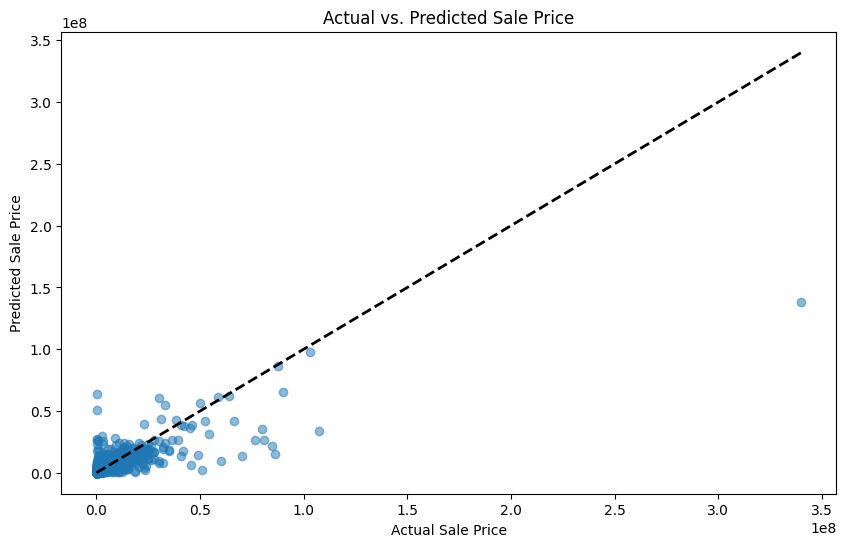

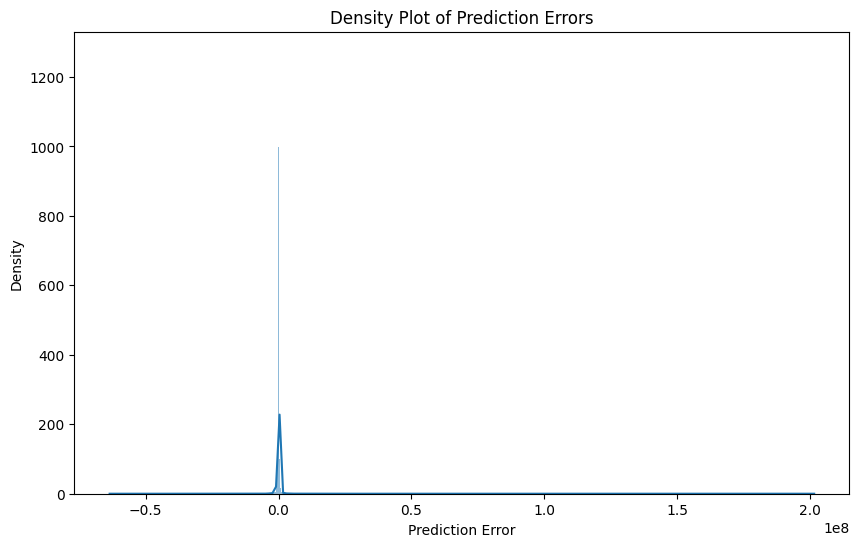

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.show()


<ipython-input-4-5d6d63d0a11c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


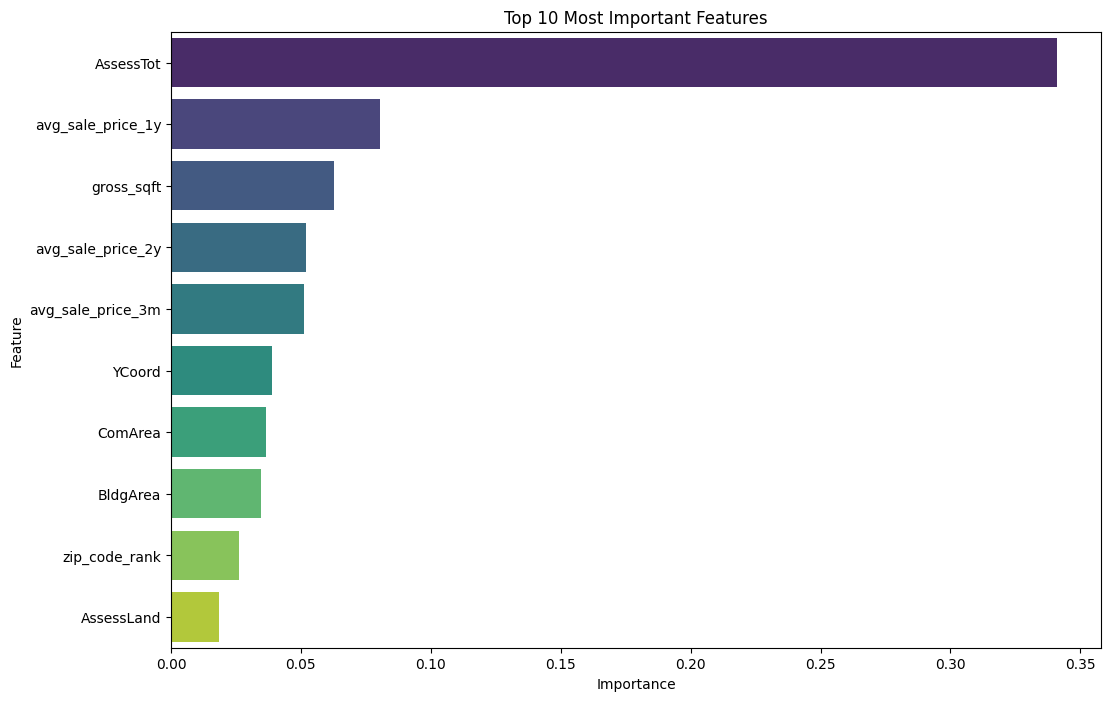

In [ ]:
import matplotlib.pyplot as plt

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_

# Creating a DataFrame to store features and their importance
features_df = pd.DataFrame({
    'Feature': numerical_data.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame to find the most important features
features_df = features_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting the 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Mean Squared Error: 221150352535.04437
Root Mean Squared Error: 470266.25706619053
R^2 Score: 0.7025099446644836


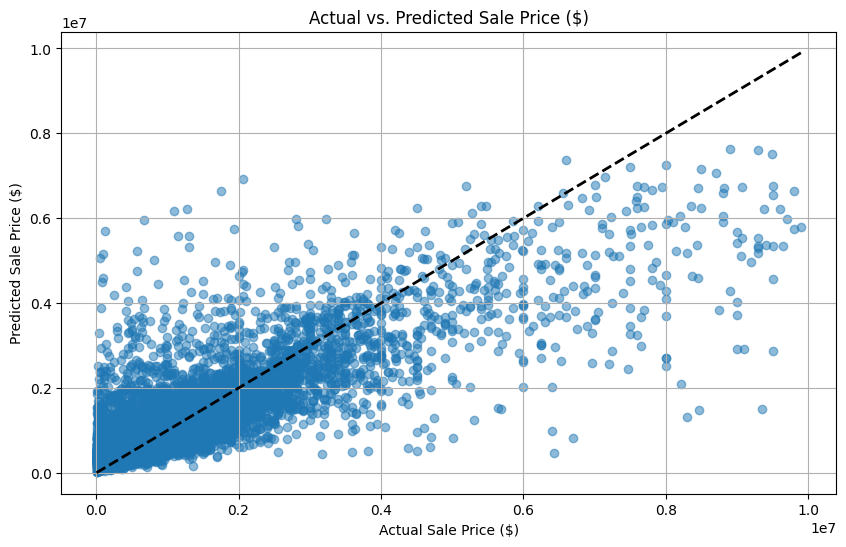

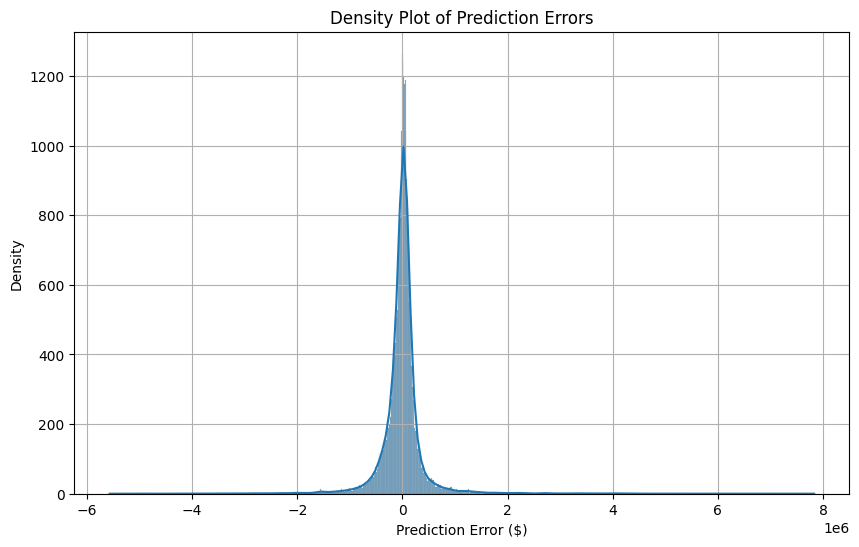

<ipython-input-2-33bd67451142>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


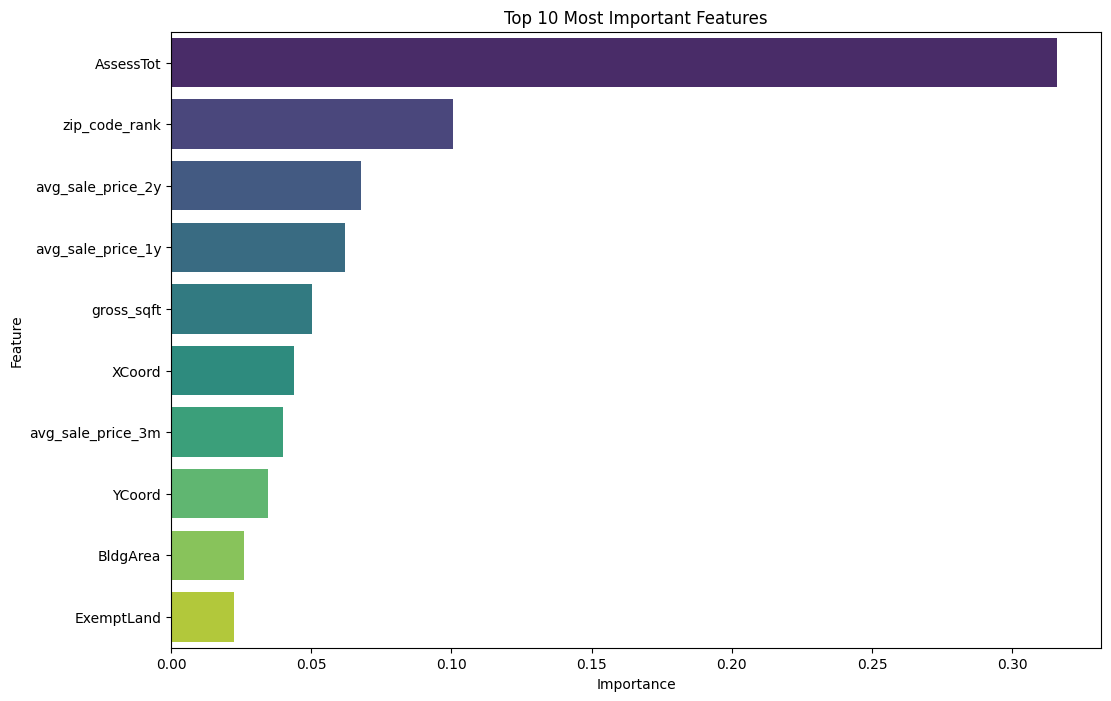

Mean Absolute Percentage Error (MAPE): 96.17116360361123%


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_data' contains features and 'y' is the sale price extracted

# Filter the data to include only sale prices less than 10 million dollars
filtered_indices = y < 10_000_000
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Splitting the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.title('Actual vs. Predicted Sale Price ($)')
plt.grid(True)
plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error ($)')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.grid(True)
plt.show()

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({
    'Feature': filtered_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plotting the 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace 0 with a very small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the test data and transform both y_test and y_pred
y_test_scaled = scaler.fit_transform(y_test.to_numpy().reshape(-1, 1)).flatten()
y_pred_scaled = scaler.transform(y_pred.reshape(-1, 1)).flatten()  # Assuming y_pred is a numpy array; if not, convert similarly

# Recalculate the MSE and RMSE using the scaled values
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

print(f"Scaled Mean Squared Error: {mse_scaled}")
print(f"Scaled Root Mean Squared Error: {rmse_scaled}")



Scaled Mean Squared Error: 0.2974900553355165
Scaled Root Mean Squared Error: 0.5454264893966156


In [4]:
# Number of observations
n = len(y_test)

# Number of features (as an approximation of parameters)
k = X_train.shape[1]

# Calculate RSS from MSE
rss = mse * n

# Calculate AIC
aic = n * np.log(rss / n) + 2 * k

# Calculate BIC
bic = n * np.log(rss / n) + k * np.log(n)

print(f"AIC: {aic}")
print(f"BIC: {bic}")


AIC: 752782.560327861
BIC: 753088.5004283242


In [ ]:
# Getting and printing all the parameters of the RandomForestRegressor
rf_params = rf_regressor.get_params()
print("Parameters used in RandomForestRegressor:")
for param, value in rf_params.items():
    print(f"{param}: {value}")


Parameters used in RandomForestRegressor:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


Mean Squared Error: 105866262398.60529
Root Mean Squared Error: 325370.9612098248
R^2 Score: 0.6430661252527743


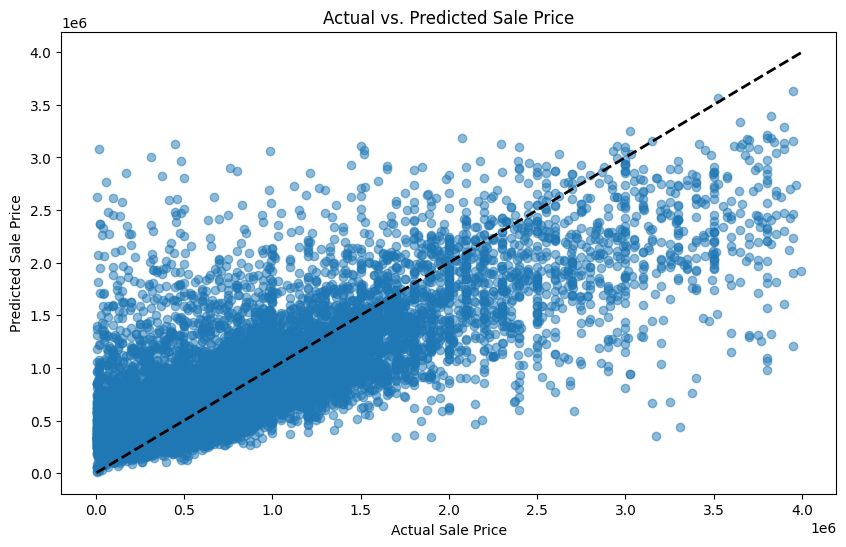

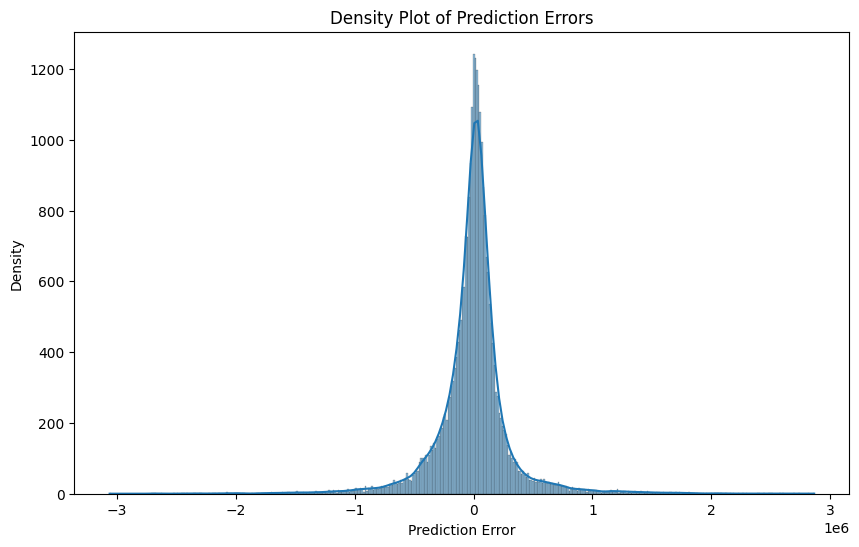

<ipython-input-6-dba6f5717ebb>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


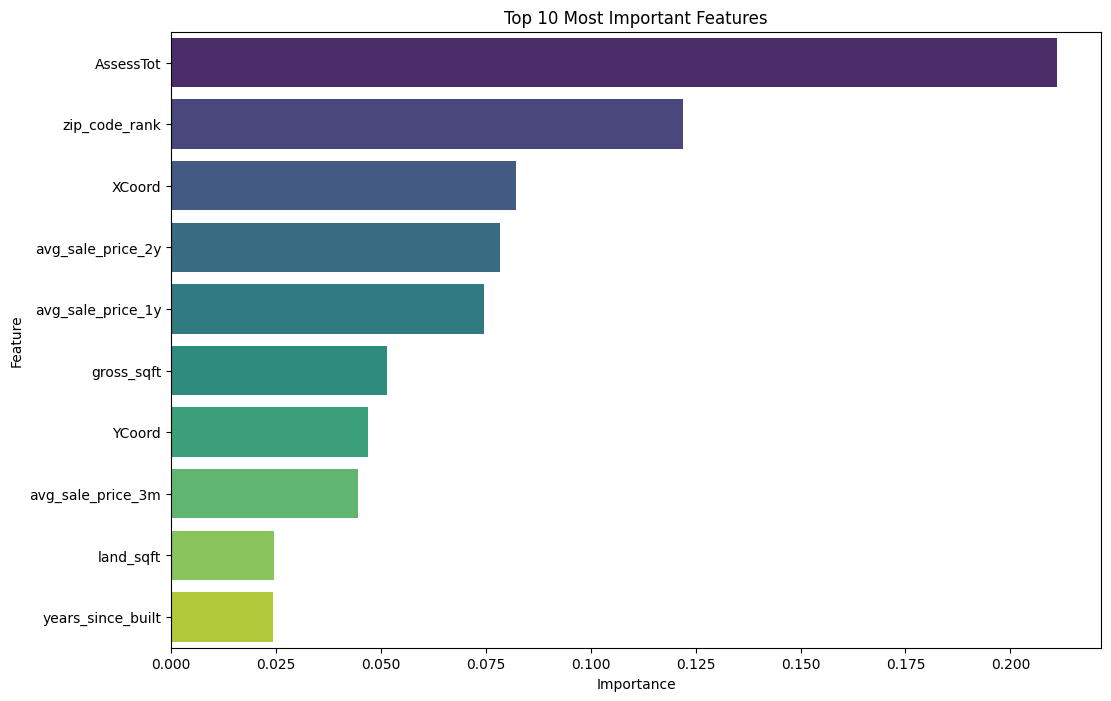

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_data' contains features and 'y' is the sale price extracted

# Filter the data to include only sale prices less than 4 million dollars
filtered_indices = y < 4_000_000
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Splitting the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.show()

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({
    'Feature': filtered_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plotting the 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace 0 with a very small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Squared Error: 41511004166955.12
Root Mean Squared Error: 6442903.395749087
R^2 Score: 0.25121080415217645


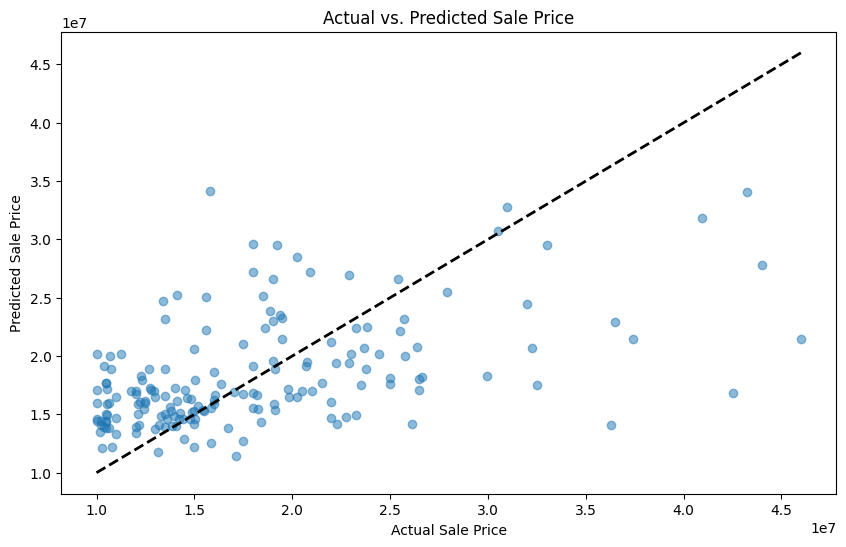

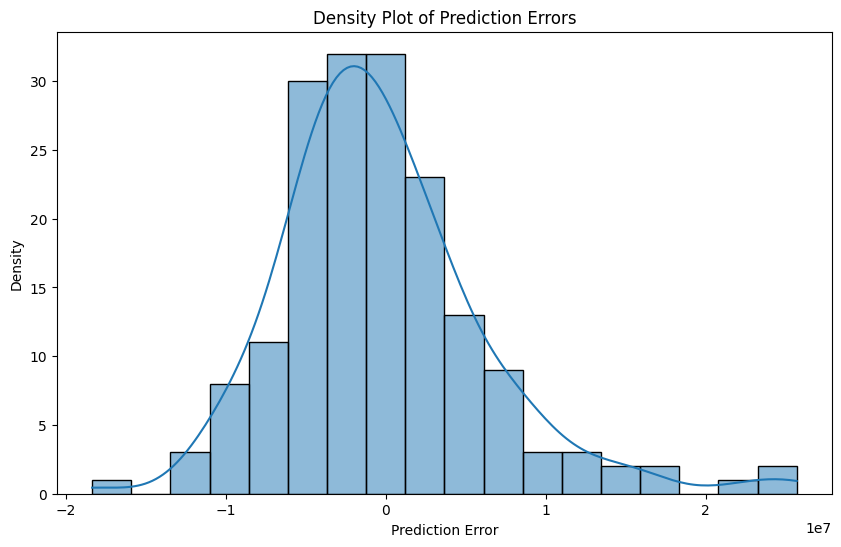

<ipython-input-7-d48128d4f2cb>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


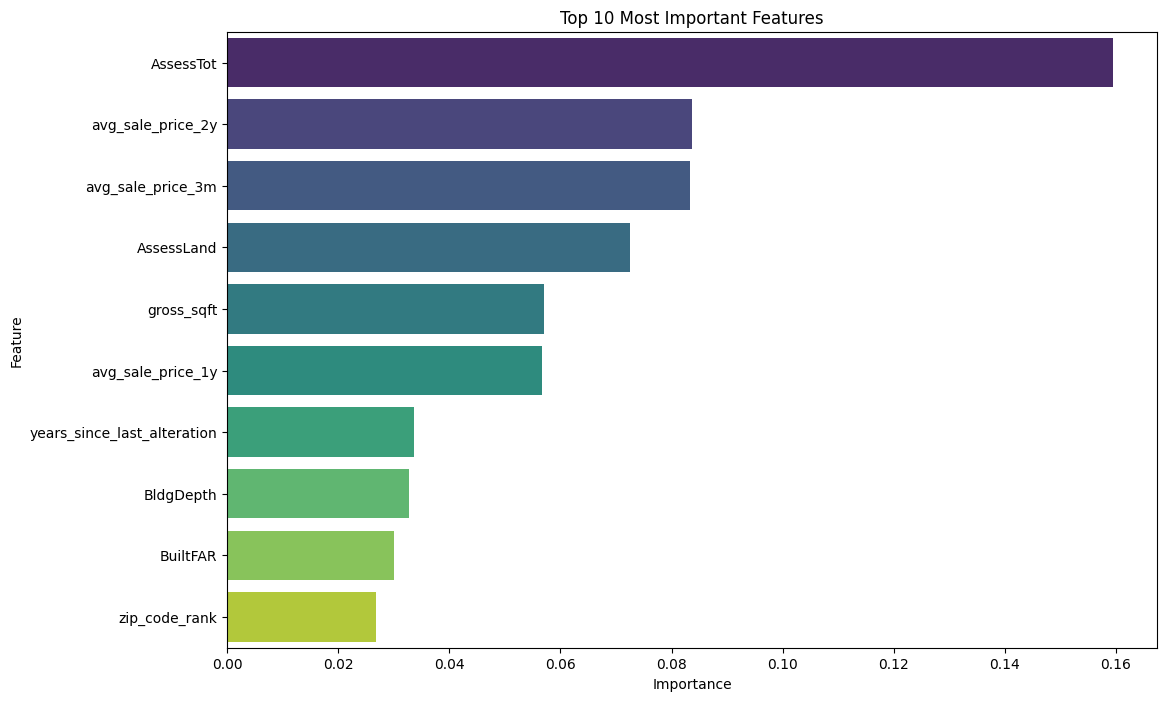

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_data' contains features and 'y' is the sale price extracted

# Filter the data to include only sale prices between 10 million and 50 million dollars
filtered_indices = (y >= 10_000_000) & (y <= 50_000_000)
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Splitting the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.show()

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({
    'Feature': filtered_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plotting the 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace 0 with a very small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Squared Error: 3265324530753048.0
Root Mean Squared Error: 57143018.215290725
R^2 Score: 0.35795171716753593


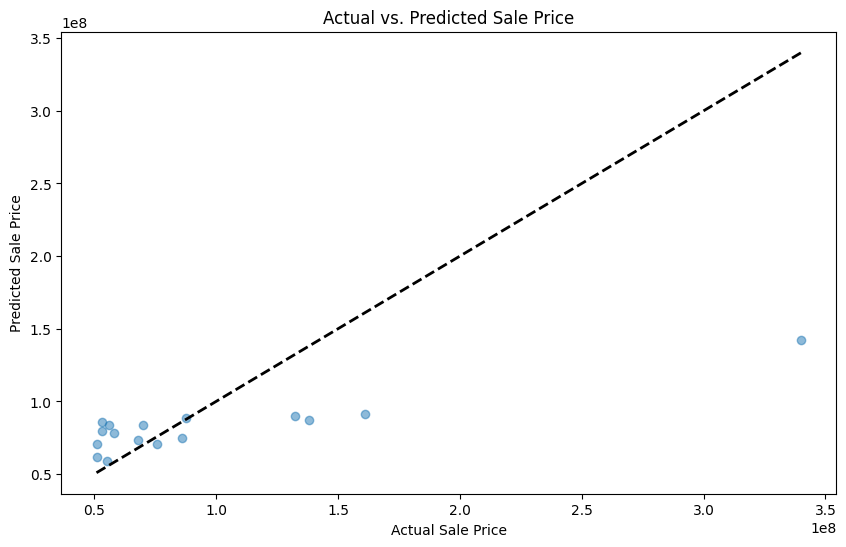

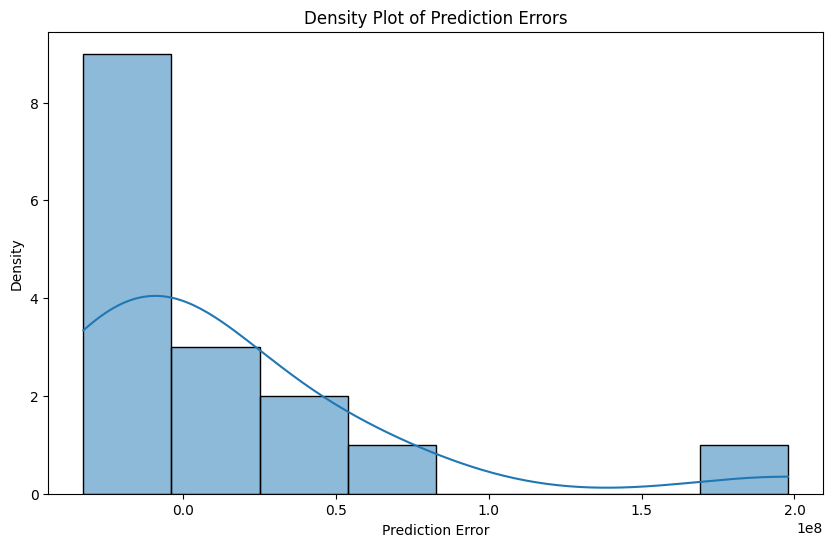

<ipython-input-8-0e2fb5aa66b7>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


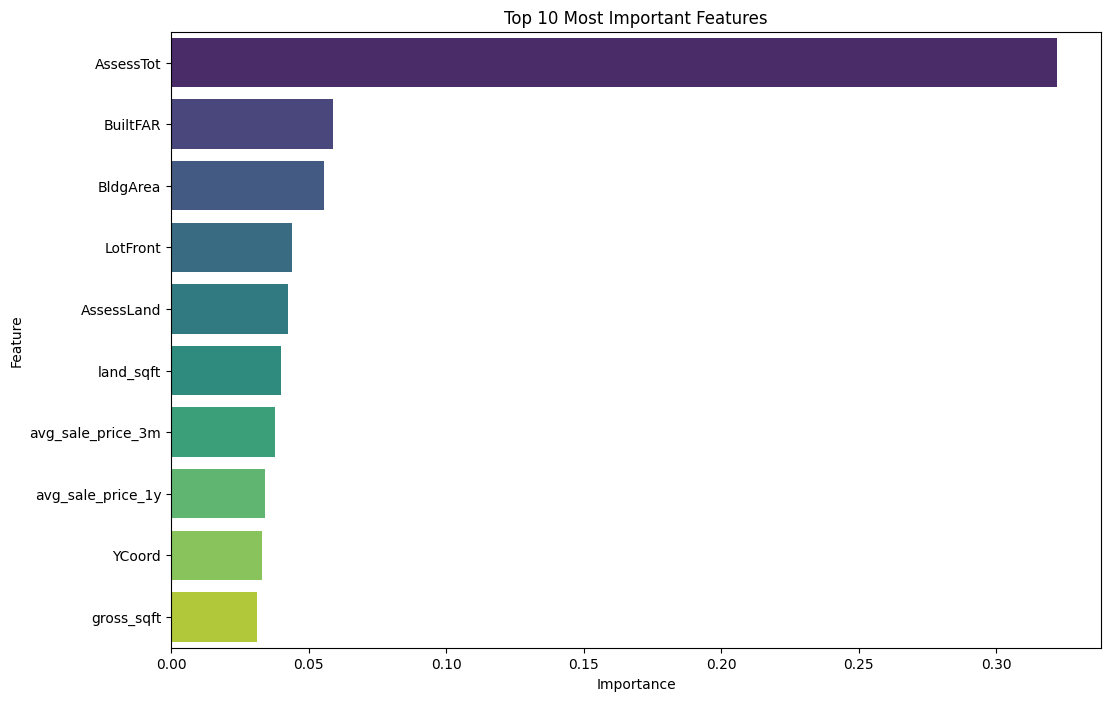

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_data' contains features and 'y' is the sale price extracted

# Filter the data to include only sale prices greater than 50 million dollars
filtered_indices = y > 50_000_000
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Splitting the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.show()

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({
    'Feature': filtered_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plotting the 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace 0 with a very small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


n_estimators: 50, R^2 Score: 0.6990459353565409
n_estimators: 100, R^2 Score: 0.7025099446644836
n_estimators: 200, R^2 Score: 0.7041509889136202
n_estimators: 400, R^2 Score: 0.7053853608709053


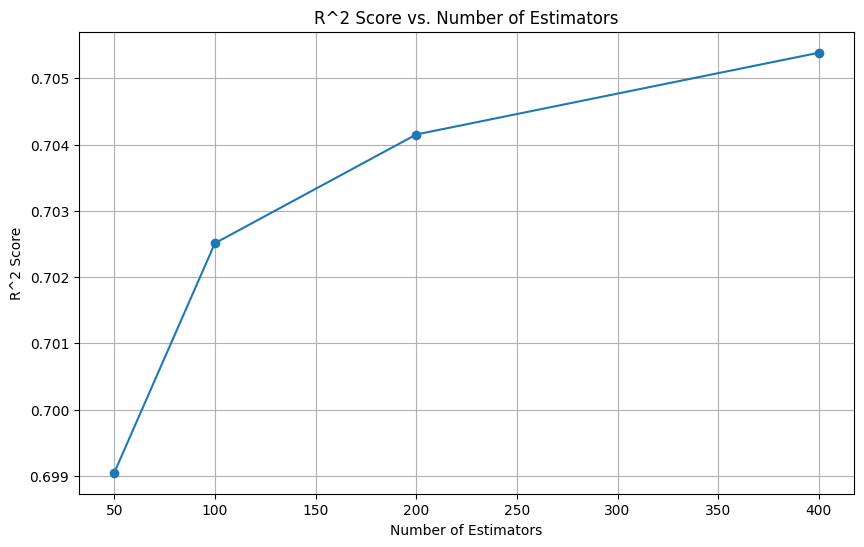

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming 'numerical_data' contains features and 'y' is the sale price extracted

# Filter the data to include only sale prices less than 10 million dollars
filtered_indices = y < 10_000_000
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Splitting the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

n_estimators_options = [50,100, 200, 400]
scores = []

for n_estimators in n_estimators_options:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)
    print(f"n_estimators: {n_estimators}, R^2 Score: {score}")

# Plotting R^2 vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Number of Estimators')
plt.grid(True)
plt.show()


max_depth: None, R^2 Score: 0.7025099446644836
max_depth: 10, R^2 Score: 0.676472668495545
max_depth: 20, R^2 Score: 0.7026170994938199
max_depth: 30, R^2 Score: 0.7026407480830736


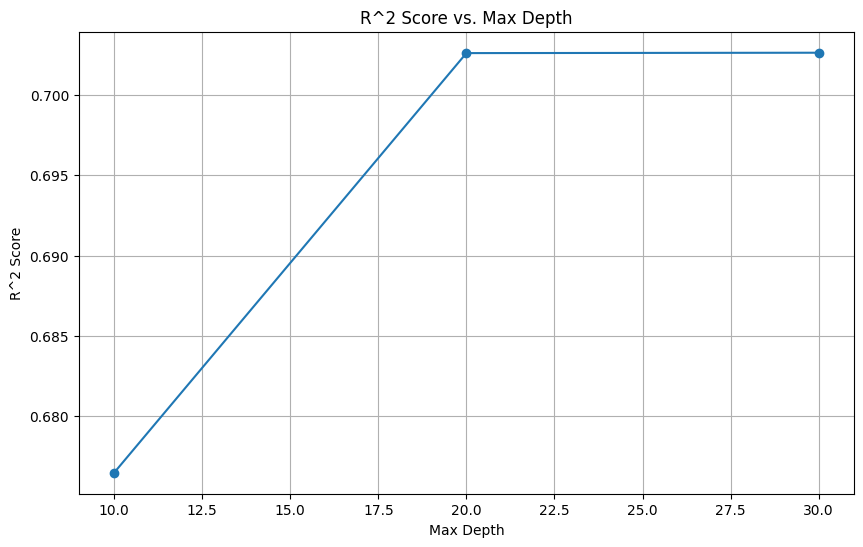

In [ ]:
max_depth_options = [None, 10, 20, 30]
scores = []

for max_depth in max_depth_options:
    rf = RandomForestRegressor(max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)
    print(f"max_depth: {max_depth}, R^2 Score: {score}")

# Plotting R^2 vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_options, scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Max Depth')
plt.grid(True)
plt.show()


min_samples_split: 2, R^2 Score: 0.7025099446644836
min_samples_split: 5, R^2 Score: 0.7032022551485474
min_samples_split: 10, R^2 Score: 0.7021068829971284
min_samples_split: 15, R^2 Score: 0.7002050985840992


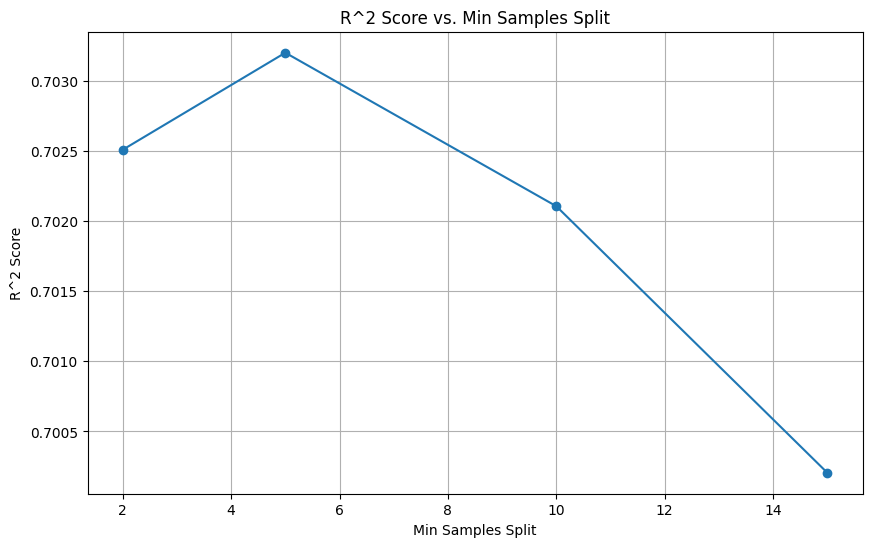

In [ ]:
min_samples_split_options = [2, 5, 10, 15]
scores = []

for min_samples_split in min_samples_split_options:
    rf = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)
    print(f"min_samples_split: {min_samples_split}, R^2 Score: {score}")

# Plotting R^2 vs. min_samples_split
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_options, scores, marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Min Samples Split')
plt.grid(True)
plt.show()


min_samples_leaf: 1, R^2 Score: 0.7025099446644836
min_samples_leaf: 2, R^2 Score: 0.7041095655841476
min_samples_leaf: 4, R^2 Score: 0.7022392870542873
min_samples_leaf: 6, R^2 Score: 0.700086976550919


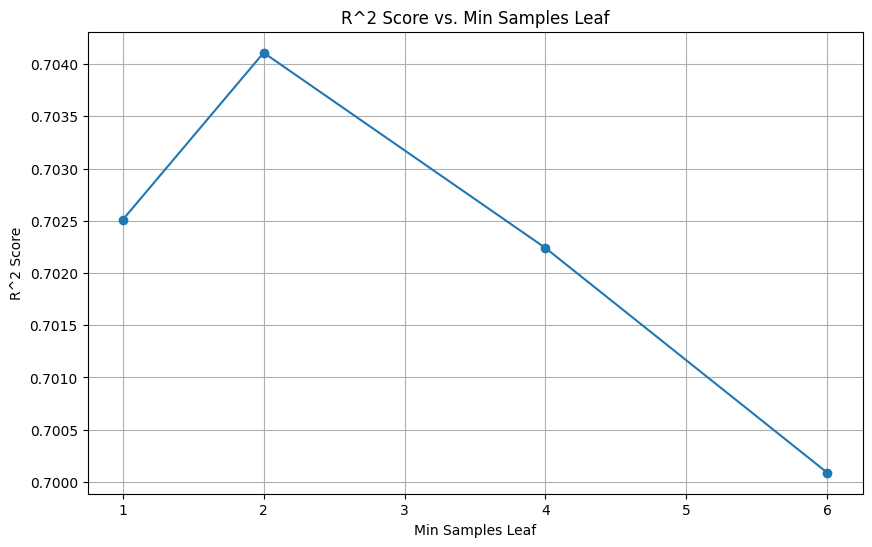

In [ ]:
# @title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming 'numerical_data' contains features and 'y' is the sale price extracted

# Filter the data to include only sale prices less than 10 million dollars
filtered_indices = y < 10_000_000
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Splitting the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

min_samples_leaf_options = [1, 2, 4, 6]
scores = []

for min_samples_leaf in min_samples_leaf_options:
    rf = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)
    print(f"min_samples_leaf: {min_samples_leaf}, R^2 Score: {score}")

# Plotting R^2 vs. min_samples_leaf
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_options, scores, marker='o')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Min Samples Leaf')
plt.grid(True)
plt.show()


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install nbconvert==5.6.1


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.5.4
    Uninstalling nbconvert-6.5.4:
      Successfully uninstalled nbconvert-6.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires nbconvert>=6.4.4, but you have nbconvert 5.6.1 which is incompatible.


In [ ]:
!pip install jinja2==3.0.3  # Downgrade jinja2 to a more compatible version
!pip install nbconvert==5.6.1



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.3
    Uninstalling Jinja2-3.1.3:
      Successfully uninstalled Jinja2-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
# Update this path to the directory where your notebook is located
notebook_directory = '/content/drive/My Drive/EDA ISYE 6740/'

# List files to confirm your notebook's presence
print("Files in the specified directory:")
!ls "{notebook_directory}"


Files in the specified directory:
 EDA.ipynb  'Filtered random forest.ipynb'   Random_forest.ipynb


In [ ]:
# Replace 'your_notebook_name.ipynb' with the exact name of your notebook
notebook_name = 'Filtered random forest.ipynb'

# Attempt to convert the notebook to PDF
try:
    !jupyter nbconvert --to pdf "{notebook_directory}{notebook_name}" --output "/content/{notebook_name.replace('.ipynb', '')}"
    print("Notebook converted successfully.")
except Exception as e:
    print(f"Failed to convert the notebook: {str(e)}")

# Try to download the resulting PDF
from google.colab import files
try:
    files.download(f"/content/{notebook_name.replace('.ipynb', '.pdf')}")
except Exception as e:
    print(f"Failed to download the file: {str(e)}")


[NbConvertApp] Converting notebook /content/drive/My Drive/EDA ISYE 6740/Filtered random forest.ipynb to pdf
[NbConvertApp] Support files will be in /content/Filtered random forest_files/
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Writing 90821 byte

In [ ]:
!sudo apt-get install texlive-xetex


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framewor

In [ ]:
notebook_path = "/content/drive/My Drive/EDA ISYE 6740/Filtered random forest.ipynb"  # Adjust this path to match your actual notebook location

# Attempt to convert the notebook to PDF
try:
    !jupyter nbconvert --to pdf "{notebook_path}" --output "/content/{notebook_path.split('/')[-1].replace('.ipynb', '')}"
    print("Notebook converted successfully.")
except Exception as e:
    print(f"Failed to convert the notebook: {str(e)}")

# Try to download the resulting PDF
from google.colab import files
try:
    files.download(f"/content/{notebook_path.split('/')[-1].replace('.ipynb', '.pdf')}")
except Exception as e:
    print(f"Failed to download the file: {str(e)}")


[NbConvertApp] Converting notebook /content/drive/My Drive/EDA ISYE 6740/Filtered random forest.ipynb to pdf
[NbConvertApp] Support files will be in /content/Filtered random forest_files/
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Making directory /content
[NbConvertApp] Writing 124323 byt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>